In [1]:
import pandas
train = pandas.read_excel('./data/train.xlsx', index_col=0)

### Сколько у человека образования:

<Axes: >

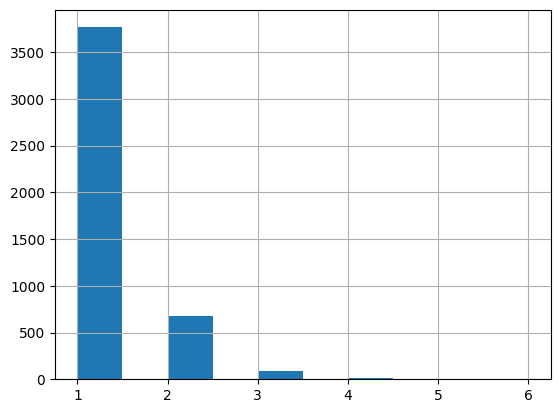

In [2]:
train[['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']].notna().astype(int).sum(axis=1).hist()

### Посмотрим на пропуски

In [3]:
(train.isna().sum() / len(train))*100

предмет              0.000000
ФИО                  0.000000
tutor_head_tags      0.000000
tutor_rating        12.950748
tutor_reviews        0.000000
description          0.021988
experience_desc     52.264732
Education_1          0.000000
Desc_Education_1     1.671064
Education_2         82.827617
Desc_Education_2    82.915567
Education_3         97.669305
Desc_Education_3    97.691293
Education_4         99.648197
Desc_Education_4    99.648197
Ученая степень 1    98.328936
Ученое звание 1     99.230431
status               0.285840
experience           0.549692
Desc_Education_5    99.934037
Desc_Education_6    99.978012
Education_5         99.934037
Education_6         99.978012
Ученая степень 2    99.978012
Ученое звание 2     99.978012
categories           0.000000
mean_price           0.000000
dtype: float64

Удалим колонки, в которых пропусков больше 80%

In [4]:
for column in train.columns:
    if (train[column].isna().sum() / len(train))*100 > 80:
        train = train.drop(columns=column)

In [5]:
(train.isna().sum() / len(train))*100

предмет              0.000000
ФИО                  0.000000
tutor_head_tags      0.000000
tutor_rating        12.950748
tutor_reviews        0.000000
description          0.021988
experience_desc     52.264732
Education_1          0.000000
Desc_Education_1     1.671064
status               0.285840
experience           0.549692
categories           0.000000
mean_price           0.000000
dtype: float64

Заполнять будем: числа медианами, а строки - пустыми строками. Статус заполним самым частым

In [6]:
train.status.unique()

array([' Университетский преподаватель', ' Школьный преподаватель',
       ' Частный преподаватель', ' Студент',
       ' Аспирант или ординатор очной формы обучения', nan,
       ' Университетский преподаватель, Школьный преподаватель',
       ' Аспирант или ординатор очной формы обучения, Частный преподаватель',
       ' Частный преподаватель, Студент',
       ' Университетский преподаватель, Аспирант или ординатор очной формы обучения',
       ' Школьный преподаватель, Аспирант или ординатор очной формы обучения'],
      dtype=object)

### Распределение таргета

<Axes: >

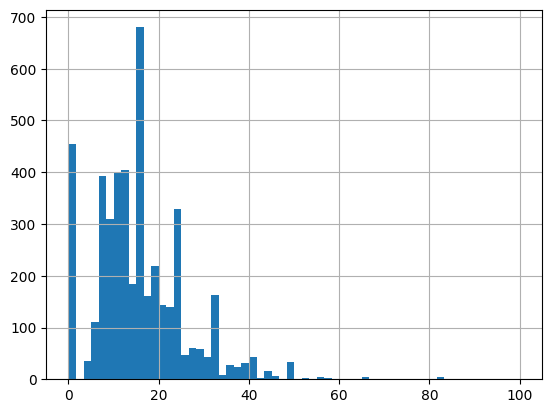

In [7]:
train.mean_price.hist(bins=60)

Распределение хорошее, балансировать выборку не буду

### Опыт преподавания

In [8]:
train['experience'] = train['experience'].fillna('0')
train['experience'] = train['experience'].apply(lambda x: int(x.split()[0]))

<Axes: >

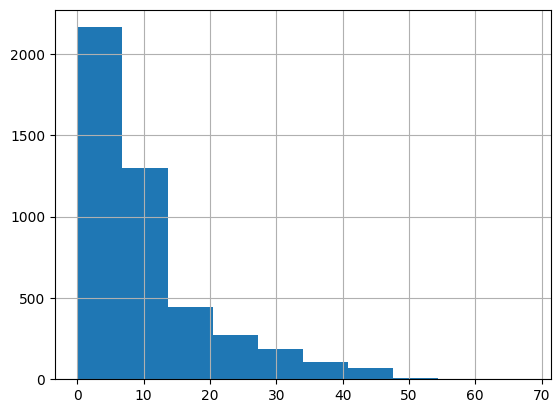

In [9]:
train['experience'].hist()

у большинства опыта нет.

### Рейтинг

<Axes: >

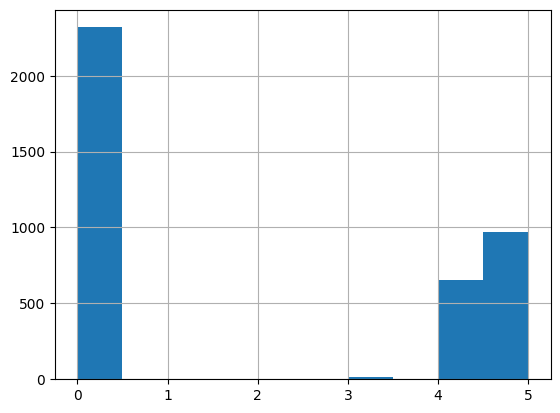

In [10]:
train.tutor_rating.hist()

### Количество отзывов

<Axes: >

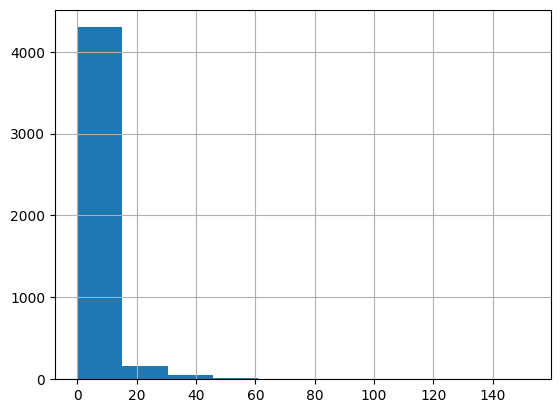

In [11]:
train.tutor_reviews.hist()

у многих нет отзывов и 0 рейтинг

### ЗАполнение nanoв

In [14]:
train['description'].fillna('', inplace=True)
train['experience_desc'].fillna('            Репетитор не предоставил информацию об опыте работы  ', inplace=True)
train['status'].fillna(train['status'].value_counts().idxmax(), inplace=True)
train['tutor_rating'].fillna(train['tutor_rating'].median(), inplace=True)
train['Desc_Education_1'].fillna('', inplace=True)
train['tutor_rating'] = train['tutor_rating'].apply(int)

In [15]:
(train.isna().sum() / len(train))*100

предмет             0.0
ФИО                 0.0
tutor_head_tags     0.0
tutor_rating        0.0
tutor_reviews       0.0
description         0.0
experience_desc     0.0
Education_1         0.0
Desc_Education_1    0.0
status              0.0
experience          0.0
categories          0.0
mean_price          0.0
dtype: float64